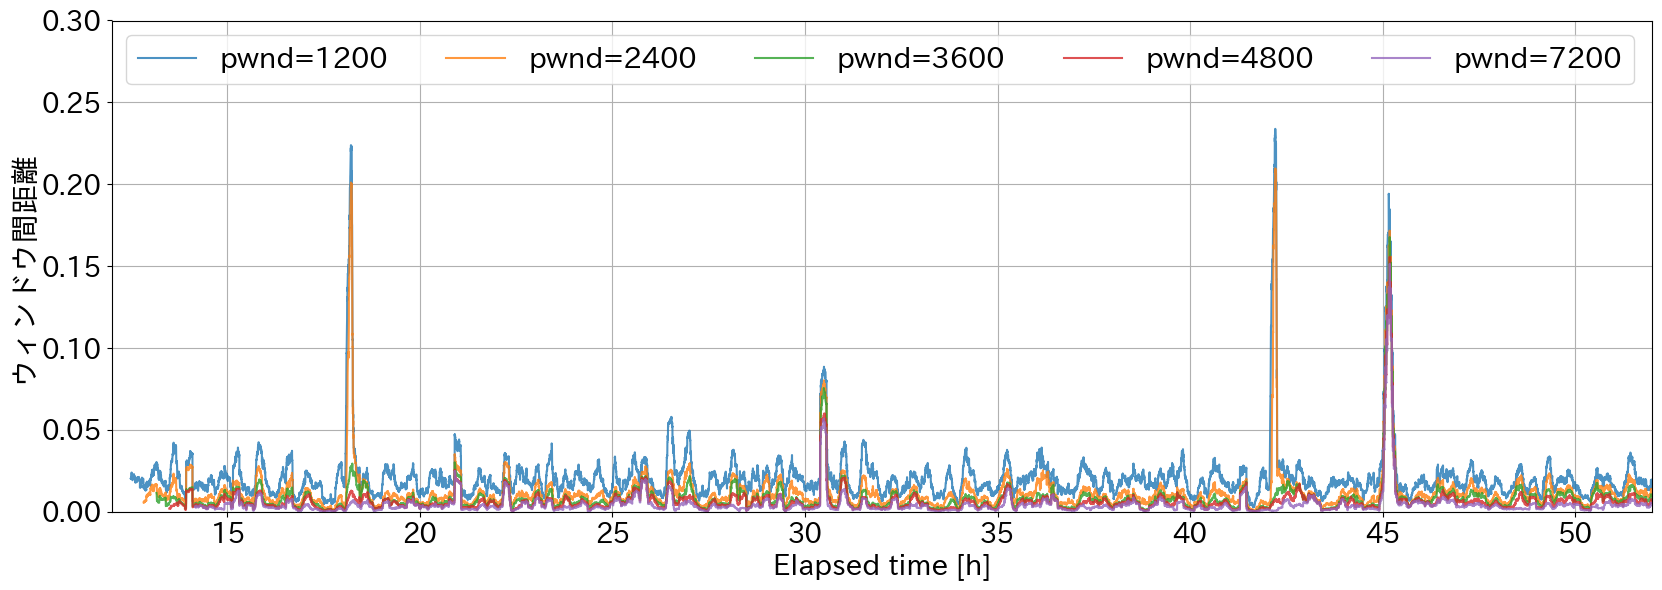

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from datetime import datetime

# window間距離に対する影響評価描画用スクリプト（パワポ資料用）：過去ウィンドウpw
dir_path_dict = {
    "pwnd=1200": "/mnt/nas0/g005/murasemaru/exp/2_DriftDetection/euc_k8/c600p1200",
    "pwnd=2400": "/mnt/nas0/g005/murasemaru/exp/2_DriftDetection/euc_k8/c600p2400",
    "pwnd=3600": "/mnt/nas0/g005/murasemaru/exp/2_DriftDetection/euc_k8/c600p3600",
    "pwnd=4800": "/mnt/nas0/g005/murasemaru/exp/2_DriftDetection/euc_k8/c600p4800",
    "pwnd=7200": "/mnt/nas0/g005/murasemaru/exp/2_DriftDetection/euc_k8/c600p7200"
}

metrix = "math"  # 特定の列名
start_date = '2022-01-10 15:00:00'
label_size = 21
ticks_size = 20
legend_size = 21

# 出力ディレクトリを設定
output_dir = "/mnt/nas0/g005/murasemaru/output/202503NS/pst"
output_file_name = "wd_pw"
os.makedirs(output_dir, exist_ok=True)

# 開始時刻の変換
start_date = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')

# データフレームの統合
dfs = []
for dir_name, dir_path in dir_path_dict.items():
    file_path = os.path.join(dir_path, 'dd_res.csv')
    
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}. Skipping.")
        continue

    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    df['elapsed_hours'] = (df['date'] - start_date).dt.total_seconds() / 3600

    if metrix in df.columns:
        df = df[['elapsed_hours', metrix]].copy()
        df['source'] = dir_name  # どのデータセットかを区別するための列を追加
        dfs.append(df)
    else:
        print(f"Column '{metrix}' not found in {file_path}. Skipping.")

# データが存在する場合のみ処理
if dfs:
    df_combined = pd.concat(dfs, ignore_index=True)

    plt.figure(figsize=(18, 6))
    
    for dir_name in dir_path_dict.keys():
        subset = df_combined[df_combined['source'] == dir_name]
        plt.plot(subset['elapsed_hours'], subset[metrix], label=f"{dir_name}", linewidth=1.5, alpha=0.8)

    plt.xlim(12, 52)
    plt.ylim(0,0.3)
    plt.xticks(fontsize=ticks_size)
    plt.yticks(fontsize=ticks_size)
    plt.xlabel("Elapsed time [h]", fontsize=label_size)
    plt.ylabel("ウィンドウ間距離", fontsize=label_size)
    plt.legend(fontsize=legend_size,ncol=5,loc="upper left",bbox_to_anchor=(0,1))
    plt.grid(True)
    plt.tight_layout()

    # 保存
    output_path = os.path.join(output_dir, f"{output_file_name}.png")
    plt.savefig(output_path, dpi=500)
    plt.show()
else:
    print("No data available for plotting.")
